<a href="https://colab.research.google.com/github/niruthikka24/Customer-Churn-Dashboard/blob/master/ML_Mini_Project_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn import ensemble

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
up1 = files.upload()

Saving Test_Dataset_190604N.csv to Test_Dataset_190604N.csv
Saving Train_Dataset_190604N.csv to Train_Dataset_190604N.csv


In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
df1 = df.copy(deep=True)
df1["intertiol_plan"] = df1["intertiol_plan"].replace(scale_mapper)
df1["voice_mail_plan"] = df1["voice_mail_plan"].replace(scale_mapper)
df1["Churn"] = df1["Churn"].replace(scale_mapper1)
df1["location_code"] = df1["location_code"].replace(scale_mapper2)
df1.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,2,0,0,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,0
1,1002,105.0,2,0,0,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,0
2,1003,97.0,2,0,1,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,0
3,1004,121.0,1,0,1,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,0
4,1005,98.0,2,0,1,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,0


In [ ]:
df3 = df.copy(deep=True)
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df3['location_code'], prefix='location_')
# Drop column B as it is now encoded
df3 = df3.drop('location_code',axis = 1)
# Join the encoded df3
df3 = df3.join(one_hot)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,no,no,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,No,0,1,0
1,1002,105.0,no,no,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,No,0,1,0
2,1003,97.0,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,No,0,1,0
3,1004,121.0,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,No,1,0,0
4,1005,98.0,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,No,0,1,0


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
df3["intertiol_plan"] = df3["intertiol_plan"].replace(scale_mapper)
df3["voice_mail_plan"] = df3["voice_mail_plan"].replace(scale_mapper)
df3["Churn"] = df3["Churn"].replace(scale_mapper1)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,0,0,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,0,0,1,0
1,1002,105.0,0,0,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,0,0,1,0
2,1003,97.0,0,1,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,0,0,1,0
3,1004,121.0,0,1,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,0,1,0,0
4,1005,98.0,0,1,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,0,0,1,0


In [ ]:
df3['Churn'].value_counts()

0    1737
1     575
Name: Churn, dtype: int64

In [ ]:
rf = RandomForestClassifier()
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
rf.fit(x_train, y_train)
#Predict test data set.
y_pred = rf.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       340
           1       0.94      0.83      0.88       123

    accuracy                           0.94       463
   macro avg       0.94      0.91      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.942, f1 score: - 0.883, roc_score: - 0.906


In [ ]:
rf = RandomForestClassifier()
#Create x and y variables.
x = df3.drop(columns=['Churn','customer_id'])
y = df3['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
rf.fit(x_train, y_train)
#Predict test data set.
y_pred = rf.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       340
           1       0.94      0.83      0.88       123

    accuracy                           0.94       463
   macro avg       0.94      0.90      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.940, f1 score: - 0.879, roc_score: - 0.904


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = rf.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred12.csv', index=False)
files.download('pred12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rf = RandomForestClassifier()
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
rf.fit(x_train, y_train)
#Predict test data set.
y_pred = rf.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       344
           1       0.94      0.77      0.85       119

    accuracy                           0.93       463
   macro avg       0.93      0.88      0.90       463
weighted avg       0.93      0.93      0.93       463

accuracy: - 0.929, f1 score: - 0.848, roc_score: - 0.878


In [ ]:
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       344
           1       0.97      0.82      0.89       119

    accuracy                           0.95       463
   macro avg       0.96      0.91      0.93       463
weighted avg       0.95      0.95      0.95       463

accuracy: - 0.948, f1 score: - 0.891, roc_score: - 0.907


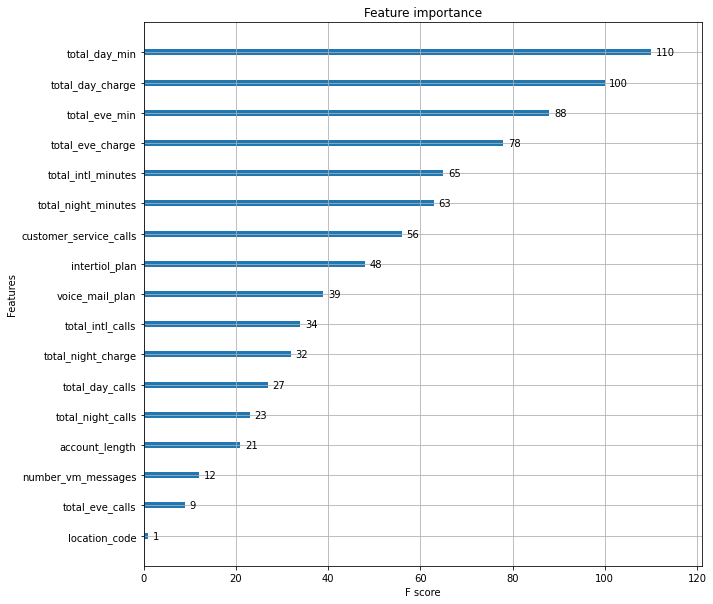

In [ ]:
ax = plot_importance(xgb)
fig = ax.figure
fig.set_size_inches(10,10)

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df3.drop(columns=['Churn','customer_id'])
y = df3['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       344
           1       0.96      0.82      0.89       119

    accuracy                           0.95       463
   macro avg       0.95      0.91      0.93       463
weighted avg       0.95      0.95      0.94       463

accuracy: - 0.946, f1 score: - 0.887, roc_score: - 0.906


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred7.csv', index=False)
files.download('pred7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       344
           1       0.97      0.80      0.88       119

    accuracy                           0.94       463
   macro avg       0.95      0.89      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.942, f1 score: - 0.876, roc_score: - 0.895


In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=10,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       344
           1       0.97      0.81      0.88       119

    accuracy                           0.94       463
   macro avg       0.95      0.90      0.92       463
weighted avg       0.95      0.94      0.94       463

accuracy: - 0.944, f1 score: - 0.881, roc_score: - 0.899


In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       344
           1       0.96      0.83      0.89       119

    accuracy                           0.95       463
   macro avg       0.95      0.91      0.93       463
weighted avg       0.95      0.95      0.95       463

accuracy: - 0.948, f1 score: - 0.892, roc_score: - 0.910


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'],axis=1)

x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
xgb.fit(x, y)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred9.csv', index=False)
files.download('pred9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Trying Oversampling

In [ ]:
X = df1.drop(['Churn'],axis=1)
y = df1['Churn']

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	# under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('model', model)] #second one in list - ('under', under),
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.972
> k=2, Mean ROC AUC: 0.973
> k=3, Mean ROC AUC: 0.972
> k=4, Mean ROC AUC: 0.973
> k=5, Mean ROC AUC: 0.972
> k=6, Mean ROC AUC: 0.972
> k=7, Mean ROC AUC: 0.972


In [ ]:
df2 = df1.copy(deep=True)
X = df2.drop(['Churn','customer_id'],axis=1)
y = df2['Churn']
# fit and apply the transform
print(y.value_counts())
oversample = SMOTE(sampling_strategy=1, k_neighbors=k)
X_over, y_over = oversample.fit_resample(X, y)
print(y_over.value_counts())

0    1737
1     575
Name: Churn, dtype: int64
0    1737
1    1737
Name: Churn, dtype: int64


In [ ]:
X = df1.drop(['Churn','customer_id'],axis=1)
y = df1['Churn']
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = XGBClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.944
> k=1, ratio=0.6, Mean ROC AUC: 0.943
> k=1, ratio=0.7, Mean ROC AUC: 0.942
> k=1, ratio=0.8, Mean ROC AUC: 0.940
> k=1, ratio=0.9, Mean ROC AUC: 0.940
> k=1, ratio=1.0, Mean ROC AUC: 0.939
> k=2, ratio=0.5, Mean ROC AUC: 0.944
> k=2, ratio=0.6, Mean ROC AUC: 0.943
> k=2, ratio=0.7, Mean ROC AUC: 0.941
> k=2, ratio=0.8, Mean ROC AUC: 0.938
> k=2, ratio=0.9, Mean ROC AUC: 0.939
> k=2, ratio=1.0, Mean ROC AUC: 0.939
> k=3, ratio=0.5, Mean ROC AUC: 0.942
> k=3, ratio=0.6, Mean ROC AUC: 0.942
> k=3, ratio=0.7, Mean ROC AUC: 0.940
> k=3, ratio=0.8, Mean ROC AUC: 0.939
> k=3, ratio=0.9, Mean ROC AUC: 0.939
> k=3, ratio=1.0, Mean ROC AUC: 0.937
> k=4, ratio=0.5, Mean ROC AUC: 0.944
> k=4, ratio=0.6, Mean ROC AUC: 0.943
> k=4, ratio=0.7, Mean ROC AUC: 0.940
> k=4, ratio=0.8, Mean ROC AUC: 0.940
> k=4, ratio=0.9, Mean ROC AUC: 0.940
> k=4, ratio=1.0, Mean ROC AUC: 0.940
> k=5, ratio=0.5, Mean ROC AUC: 0.942
> k=5, ratio=0.6, Mean ROC AUC: 0.941
> k=5, ratio

In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       332
           1       0.95      0.83      0.88       189

    accuracy                           0.92       521
   macro avg       0.93      0.90      0.91       521
weighted avg       0.92      0.92      0.92       521

accuracy: - 0.921, f1 score: - 0.884, roc_score: - 0.901


In [ ]:
x = df1.drop(columns=['Churn','customer_id'])#,'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1

In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])#
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'],axis=1)

x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
xgb.fit(x_over, y_over)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred10.csv', index=False)
files.download('pred10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = XGBClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.932
> k=1, ratio=0.6, Mean ROC AUC: 0.931
> k=1, ratio=0.7, Mean ROC AUC: 0.929
> k=1, ratio=0.8, Mean ROC AUC: 0.929
> k=1, ratio=0.9, Mean ROC AUC: 0.926
> k=1, ratio=1.0, Mean ROC AUC: 0.928
> k=2, ratio=0.5, Mean ROC AUC: 0.932
> k=2, ratio=0.6, Mean ROC AUC: 0.929
> k=2, ratio=0.7, Mean ROC AUC: 0.928
> k=2, ratio=0.8, Mean ROC AUC: 0.927
> k=2, ratio=0.9, Mean ROC AUC: 0.927
> k=2, ratio=1.0, Mean ROC AUC: 0.925
> k=3, ratio=0.5, Mean ROC AUC: 0.932
> k=3, ratio=0.6, Mean ROC AUC: 0.930
> k=3, ratio=0.7, Mean ROC AUC: 0.927
> k=3, ratio=0.8, Mean ROC AUC: 0.926
> k=3, ratio=0.9, Mean ROC AUC: 0.926
> k=3, ratio=1.0, Mean ROC AUC: 0.922
> k=4, ratio=0.5, Mean ROC AUC: 0.931
> k=4, ratio=0.6, Mean ROC AUC: 0.930
> k=4, ratio=0.7, Mean ROC AUC: 0.929
> k=4, ratio=0.8, Mean ROC AUC: 0.927
> k=4, ratio=0.9, Mean ROC AUC: 0.925
> k=4, ratio=1.0, Mean ROC AUC: 0.924
> k=5, ratio=0.5, Mean ROC AUC: 0.931
> k=5, ratio=0.6, Mean ROC AUC: 0.929
> k=5, ratio

In [ ]:
x = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=6)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]

x = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=6)
x_over, y_over = oversample.fit_resample(x, y)
xgb = XGBClassifier(n_estimators=75,gamma=1,max_depth=10,eta=0.1,objective='binary:logistic')
xgb.fit(x_over, y_over)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred11.csv', index=False)
files.download('pred11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pred 7 -> hypertuned xgb - 0.90666

pred 8 -> hypertuned xgb, 'Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages' removed - 0.90333

pred 9 -> hypertuned xgb, same features as above removed, but trained model on entire train (not just 80%) before predicting test - 0.90666

pred 10 -> hypertuned xgb,  SMOTE(sampling_strategy=0.5, k_neighbors=2) applied, same features as above removed - 0.90777

pred11 -> hypertuned xgb, 'total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan' were the only features selected based on xgboost feature importance plot, SMOTE(sampling_strategy=0.5, k_neighbors=6) was applied - 0.87888